<a href="https://colab.research.google.com/github/cpvivek/Global-Terrorism-Database-EDA/blob/main/Global_Terrorism_Database_EDA__Vivek_CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA on Global Terrorism Database
Global Terrorism Database (GTD) is a dataset maintained by National Consortium for the Study of Terrorism and Responses to Terrorism (START), and contains the record of terrorism activities around the globe since 1970.

# Scope of the Project
Since this is an exploratory data analysis project, the scope of the project would be limited to deriving meaningful insights/patterns from the dataset, on a global, regional (Primarily South Asian) and national(India) level. 
The focus here would not essentialy be to obtain solutions to problems pertaining to terrorism, but rather to derive intuitons from the dataset.

My contribution to the project as an individual are focused on following deliverables:



1. Visual Representation of attacks over the globe.
2. Word cloud displaying the group names with font size proportional to frequency of attacks.
3. Which group has the highest success rate?
4. Success rate of different attack types.
5. Actions of major groups.
6. Which group has attacked most number of countries?
7. Heat Maps
8. Tree Maps
9. Time lines





# Data Preparation

Since this is a huge data set with over 136 fields and 1.8 lakh rows, we need to weed out unrequired fields, fill NaN values appropriately, and rename the fields to suit our convenience.

In [ ]:
#let's take help of following libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px #I prefer to use plotly.express predominantly for most of my visualisation. 
import plotly.graph_objects as go   

In [ ]:
# #Plotly has a new update and I love it already :'). Let's get rid of version 4.4.1 and get 5.3.1 tenacity 8.0.1
pip install --upgrade plotly

     |████████████████████████████████| 23.9 MB 14 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The following dataset contains records of terrorist attacks from 1970 all the way to 2017

In [ ]:
# Reading the dataset. 
gtd_global_primary=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alma Better Pro Program/Capstone Projects/EDA Capstone/Data Sets/Global Terrorism Data/Global Terrorism Data_2017.csv',encoding='ISO-8859-1')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
gtd_global_primary.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
#columns in the dataset:
list(gtd_global_primary)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

A lot of the field names here are hard to make sense of. So here's a code book if you're curious.

https://www.start.umd.edu/gtd/downloads/Codebook.pdf

In [ ]:
#cleaning up dataset and selecting fields that I believe we need for the analysis
gtd_global=gtd_global_primary[['eventid','iyear','imonth','iday','country_txt','region_txt', 'city','provstate',
                       'latitude','longitude','summary','success','suicide','attacktype1_txt','targtype1_txt',
                       'gname','claimed','motive','weaptype1_txt','nkill','nwound','propvalue']]
                       

In [ ]:
#cleaning up the NaN values.
gtd_global['country_txt'].fillna('Unknown',inplace=True)
gtd_global['region_txt'].fillna('Unknown',inplace=True)
gtd_global['city'].fillna('Unknown',inplace=True)
gtd_global['provstate'].fillna('Unknown',inplace=True)
gtd_global['latitude'].fillna('Unknown',inplace=True)
gtd_global['longitude'].fillna('Unknown',inplace=True)
gtd_global['summary'].fillna('Unknown',inplace=True)
gtd_global['success'].fillna('Unknown',inplace=True)
gtd_global['suicide'].fillna('Unknown',inplace=True)
gtd_global['attacktype1_txt'].fillna('Unknown',inplace=True)
gtd_global['targtype1_txt'].fillna('Unknown',inplace=True)
gtd_global['gname'].fillna('Unknown',inplace=True)
gtd_global['claimed'].fillna(0,inplace=True) #You can't really 'not know' if its claimed. :/. I'm taking the liberty to assume the NaN values here are unclaimed.
gtd_global['motive'].fillna('Unknown',inplace=True)
gtd_global['weaptype1_txt'].fillna('Unknown',inplace=True)
gtd_global['nkill'].fillna(0,inplace=True)
gtd_global['nwound'].fillna(0,inplace=True)
gtd_global['propvalue'].fillna(0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#renaming the columns
gtd_global.rename(columns={'iyear':'year',
                           'imonth':'month',
                           'iday':'day',
                           'country_txt':'country',
                           'region_txt':'region',
                           'provstate':'state',
                           'attacktype1_txt':'attack_type',
                           'targtype1_txt':'target_type',
                           'gname':'organisation',
                           'weaptype1_txt':'weapon_type'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#adding casuality column to the data frame. Casulities= nwound+casuality
gtd_global['casuality']=gtd_global.nkill+gtd_global.nwound

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#creating subsets for the regional and national level analysis
gtd_SA=gtd_global[gtd_global.region=='South Asia']
gtd_india=gtd_global[gtd_global.country=='India']


#1. Global Visualisation of attacks over the world
Let's zoom out and have a look at the situation.

In [ ]:
#creating a df with frequency of attacks grouped by countries
gtd_country=gtd_global.groupby('country')['eventid'].count().reset_index() #this would give us total number of attack in each country over the time

gtd_country_timeline=gtd_global.groupby(['year','country'])['eventid'].count().reset_index() # this dataframe would help us with a timeline of every year since 1970


In [ ]:
#visualisation
total_attacks=px.choropleth( gtd_country,locations='country',locationmode='country names',color='eventid',
                  hover_name='country',projection='orthographic',title='Total number of attacks(1970-2019)'
                  ,color_continuous_scale = px.colors.sequential.Plasma,
                  labels={'eventid':'attacks'})

total_attacks.show()


timeline=px.choropleth(gtd_country_timeline,locations='country',locationmode='country names',color='eventid',
                  hover_name='country',title='Time line of attacks in each year from 1970 to 2019',
                  color_continuous_scale = px.colors.sequential.Plasma,
                  animation_frame='year',
                  labels={'eventid':'attacks'})

timeline.show()

print('use the animation frame above to navigate through years')

use the animation frame above to navigate through years


**Remarks**
1. It's evident from the figure that the terrorist attacks are quite concentrated in a handful of countries like Afghanistan, Pakistan, Iraq, India etc.

2. It can be observed that things starteg getting grim for India in the late 80s, where it started gaining more traction than the rest of the countries.

# 2. Word cloud displaying the group names with font size proportional to frequency of attacks.
Word cloud is a useful way to assess the data at a glance

In [ ]:
#df with organisations and corresponding frequency of attacks
global_org_frequency=gtd_global.groupby('organisation')['eventid'].count().reset_index().rename(columns={'eventid':'attacks'})

In [ ]:
#creating dictionary with group names and corresponding frequency of attacks. We'll be using this dictionary to generate the wordlcoud
organisation_dict={}
for group,attacks in zip(global_org_frequency.organisation,global_org_frequency.attacks):
  organisation_dict[group]=attacks

In [ ]:
from wordcloud import WordCloud #Importing wordcloud library.
plt.rcParams['figure.figsize']=(20,20) #setting figure size

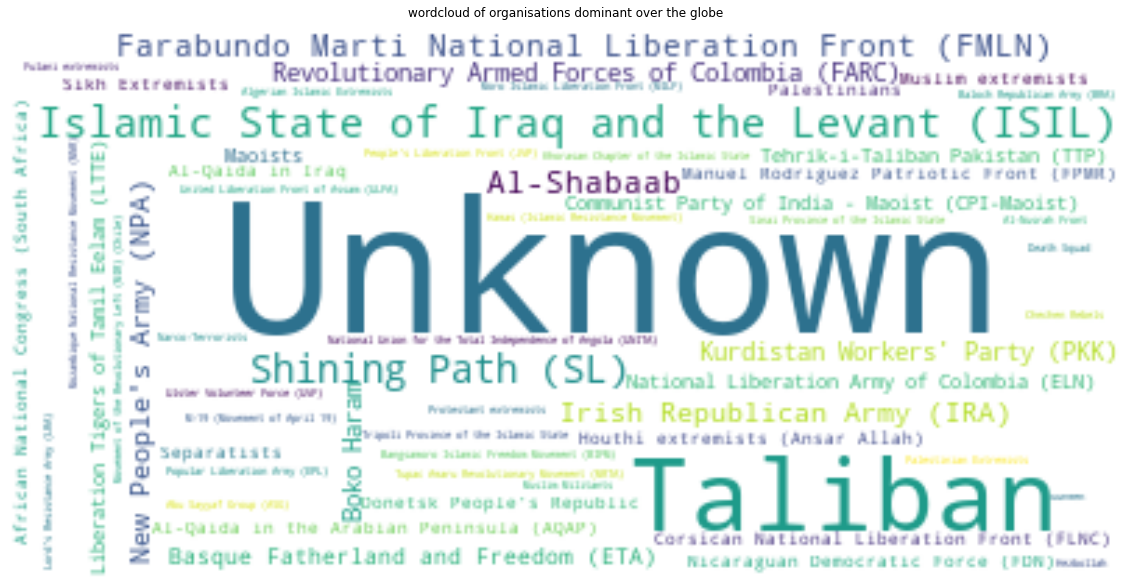

In [ ]:
wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(frequencies=organisation_dict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('wordcloud of organisations dominant over the globe')
plt.axis("off")
plt.show()



**Remarks**:

The unknown faction, accounts for majority of the attacks. These could be the attacks which are not claimed by any organisation, or work of an individual or small group of individuals, belonging to no formal organisation.
Putting aside the unknown, Taliban clearly towers above the the rest in terms of attack frequency.
ISIL, IRA, NPA, CPI(Maiosts), PKK are few other noteable organisations.

# South Asia

In [ ]:
#df with organisation and corresponding frequency of attacks
SA_org_frequency=gtd_SA.groupby('organisation')['eventid'].count().reset_index().rename(columns={'eventid':'attacks'})

In [ ]:
organisation_sth_asia_dict={} #We'll use this dict to generate the wordcloud
for group,attacks in zip(SA_org_frequency.organisation,SA_org_frequency.attacks):
  organisation_sth_asia_dict[group]=attacks

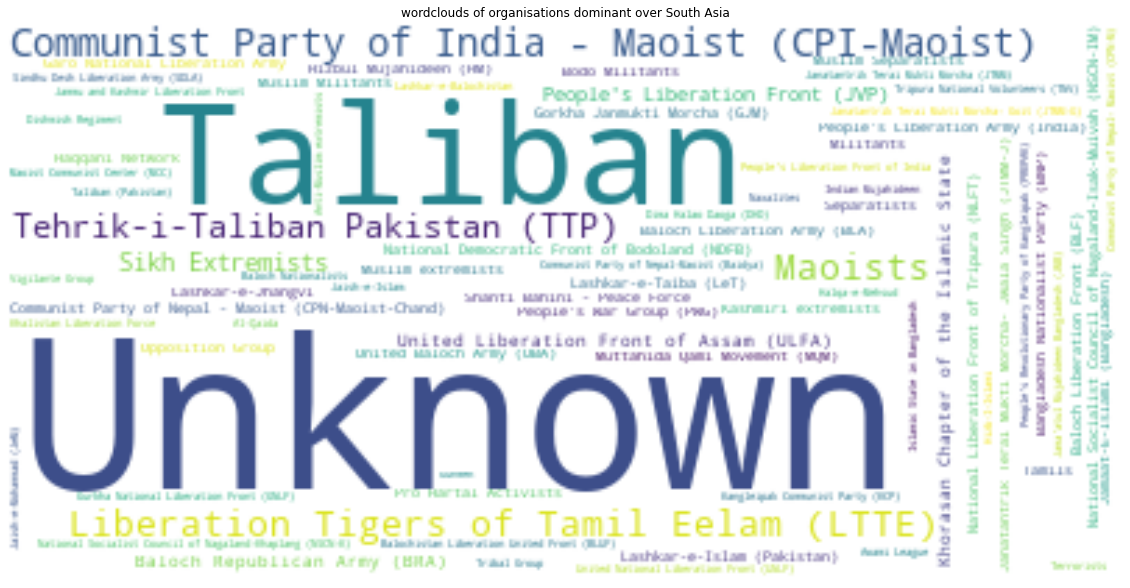

Word cloud of group attack frequencies across South East Asia


In [ ]:
wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(frequencies=organisation_sth_asia_dict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('wordclouds of organisations dominant over South Asia')
plt.axis("off")
plt.show()
print("Word cloud of group attack frequencies across South East Asia")



Remarks:

1. The unknown faction remains the major contributor here too.
2. Taliban again, leads in terms of attacks over the South Asia Region.
3. Communist Party of India(Maoists), TTP, LTTE are few other organisation with considerable attack frequency.

**India**

In [ ]:
india_org_frequency=gtd_india.groupby('organisation')['eventid'].count().reset_index().rename(columns={'eventid':'attacks'})

In [ ]:
organisation_india_dict={}
for group,attacks in zip(india_org_frequency.organisation,india_org_frequency.attacks):
  organisation_india_dict[group]=attacks

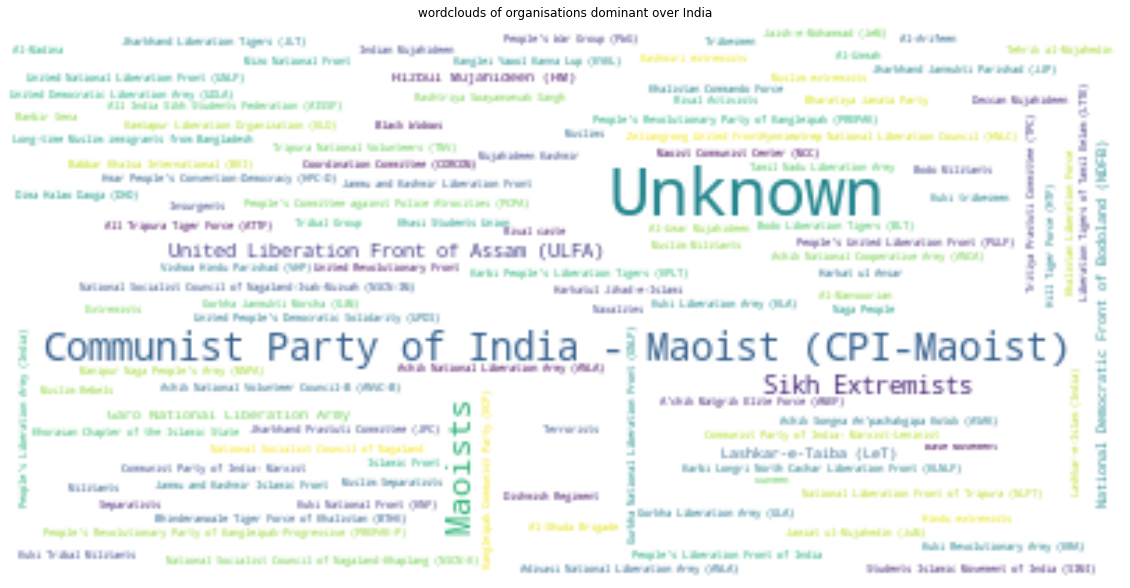

In [ ]:
wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(frequencies=organisation_india_dict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('wordclouds of organisations dominant over India')
plt.axis("off")
plt.show()

**Remarks:**

1. CPI(Maoists) is the organisation with greatest attack frequency in India.
2. We could say the majority of the attacks are caused by the top few organisations here.
3. Sikh Extremists, Maoists, ULFA are few of the major players here.

# 3. Which group has highest success rate at all three levels?
Are the groups with the most attack frequency the most succesful ones?